### Python Feature Engineering Cookbook
Soledad Galli

### Feature Engineering for Machine Learning
Alice Zheng & Amanda Casari

<b>[1.Distributions](#1)<br></b>
    1.1 Identify a Normal Distribution<br>
    1.2 Finding & Removing Outliers<br>
    
<b>[2. Replacing Missing Values](#2)<br></b>
    2.1 Random numbers from the sample<br>
    2.2 Adding a missing value indicator colmn<br>
    2.3 Performing multivariate imputation by chained equations<br>
    
<b>[3. Encoding Categorical Variables](#3)<br></b>
    3.1 One Hot Encoding<br>
    3.2 OneHotEncoding of Frequent Categories<br>
    3.3 Replacing Categories with Ordinal Numbers<br>
    3.4 Replacing Categories with Counts/Frequency of Observations<br>
    3.5 Encoding with Integers in an Ordered Manner<br>
    3.6 Mean Encoding<br>
    3.7 Encoding with the Weight of Evidence (WoE)<br>
    3.8 Grouping Rare or Infrequent Categories<br>
    3.9 Feature Hashing<br>

<b>[4. Transforming Numerical Variables](#4)<br></b>

<b>[5. Feature Discretization](#5)<br></b>
    5.1 Binning with Equal Width Intervals<br>
    5.2 Binning with Equal Frequency Intervals<br>
    5.5 Binning with k-means Clustering<br>
    5.6 Binning with Decision Trees<br>

<b>[6. Outliers ](#6)<br></b>
    6.1 Trimming Outliers<br>
    6.2 Winsorization<br>
    6.3 Capping the variable at arbitrary maximum and minimum values<br>

<b>[7. Feature Scaling](#7)<br></b>
    7.1 Standarizing<br>
    7.2 Mean Normalization<br>
    7.3 Scaling to the Maximum and Minimum Values<br>
    7.4 Maximum Absolute Scaling<br>
    7.5 Scaling with the Median and Quantiles<br>
    
<b>[8. Applying Mathematical Computations to Features](#8)<br></b>
    8.1. Combining multiple features with statistical operations<br>
    8.3 Feature Generation with Decision Trees (linear)<br>
    8.4 Principal Component Analysis (linear)<br>
    8.5 Non-linear Feature Generation with k-means<br>

<b>[9. Feature Generation with Transactional and Time Series Data](#9)<br></b>
    9.1 Aggregating Transactions in a Time Window (Moving Average)<br>
    9.2 Determining the Number of Local Maxima and Minima<br>
    9.3 Deriving Time Elapsed between Time-Stamped Events<br>
    9.4 Deriving Features from Date and Time Variables<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [31]:
import scipy

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [3]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer

In [4]:
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
url = "https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data = pd.read_csv(url)
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv', index=False)

## ========================================================================
## <a id='1'> 1. Distributions</a>
### 1.1 Identify a Normal Distribution

In [4]:
x = np.random.randn(100)
df = pd.DataFrame(x)
df.columns = ['x']

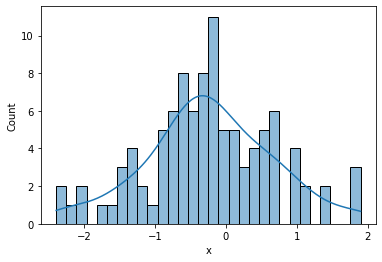

In [14]:
#make a histogram and a density plot
sns.histplot(df['x'],kde=True,bins=30);

Create a Q-Q plot. When the variable is normally distributed, its values follow the theoratical quantiles and thus lie along the 45deg diagonal.<br>
probplot Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (norm).

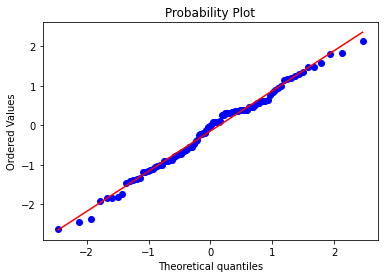

In [26]:
stats.probplot(x=x,dist='norm',plot=plt)
plt.show();

### 1.2 Finding & Removing Outliers

According to the inter-quantile-range IQR proximity rule, a value is an outlier if it falls outside these boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)<br>
Lower boundary = 25th quantile - (IQR * 1.5)

IQR = 75th quantile - 25th quantile


In [48]:
df = pd.DataFrame([-1,0,1,3,4,5,7,-3,-9,1000],columns=['x'])

iqr = df['x'].quantile(0.75) - df['x'].quantile(0.25)

upper = df['x'].quantile(0.75) + 1.5*iqr
lower = df['x'].quantile(0.25) - 1.5*iqr

In [80]:
#find the outlier indexes
outliers = (df['x']<lower) | (df['x']>upper)

#removing outliers
df = df.loc[~outliers,'x']
df

0   -1
1    0
2    1
3    3
4    4
5    5
6    7
7   -3
8   -9
Name: x, dtype: int64

## ========================================================================
## <a id=2> 2. Replacing Missing Values </a>
- Mean (use training set parameters for the test set)
- Median (use training set parameters for the test set)
- Mode (use training set parameters for the test set)
- Outlier (99, 999) (doesn't matter as long as 99 or 999 is also an outlier in the test set)
- Random numbers from the sample (use training set to extract random values and use them to fillna both training & test sets)

### 2.1 Random numbers from the sample

In [2]:
l = [1,2,5,np.nan,98,12,56,np.nan,10,64,82,87,np.nan]
df = pd.DataFrame(l,columns=['A'])

In [111]:
df['A'].isnull().sum()

3

In [108]:
sample = df['A'].dropna().sample(3)
#indexes of the sample have to be the same as indexes of nan to replace them
sample.index = df[df['A'].isnull()].index

#replace null
df.loc[df['A'].isnull(),'A'] = sample

### 2.2 Adding a missing value indicator colmn
It's a binary variable that specifies whether a value was missing for an
observation (1) or not (0). It is common practice to replace missing observations by the mean, median, or mode while flagging those missing observations with a missing indicator, thus covering two angles: if the data was missing at random, this would be contemplated by the mean, median, or mode imputation, and if it wasn't, this would be captured by the missing indicator.

In [55]:
l = [1,2,5,np.nan,98,12,56,np.nan,10,64,82,87,np.nan]
df = pd.DataFrame(l,columns=['A'])

In [56]:
#Method1
df['is_missing'] = df['A'].apply(lambda x: 1 if np.isnan(x) else 0)

In [57]:
#Method2
df['is_missing2'] = np.where(df['A'].isnull(),1,0)

In [58]:
df

,A,is_missing,is_missing2
0,1.0,0,0
1,2.0,0,0
2,5.0,0,0
3,NaN,1,1
4,98.0,0,0
5,12.0,0,0
6,56.0,0,0
7,NaN,1,1
8,10.0,0,0
9,64.0,0,0


### 2.3 Performing multivariate imputation by chained equations

A strategy for replacing missing values (imputation) by estimating each feature from all the others.

1. A simple imputation (ex: replacing with mean) is performed for every feature with missing data
2. feature(i) is selected. And the missing values are set back to missing.
3. We build a model to predict feature(i) based on the other features.
4. The missing values for feature(i) are replaced with the new estimates.
5. Repeat step 2 to 4 for all the remaining variables.
6. Once all variables have been modeled based on the rest, a cycle of imputation is concluded. Typically we have 10 cycles.

Using IterativeImputer() from scikit-learn, we can model variables using multiple algorithms, such as Bayes, k-nearest neighbors, decision trees, and random forests. 

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [5]:
variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']
data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('A16', axis=1),data['A16' ], test_size=0.3,random_state=0)

In [12]:
imputer = IterativeImputer(estimator=BayesianRidge(),max_iter=0,random_state=0)
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), max_iter=0, random_state=0)

In [13]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

## ========================================================================
## <a id=3> 3. Encoding Categorical Variables<a>

1. One-Hot Encoding
2. One-Hot Encoding of frequent categories
3. Replacing categories with ordinal numbers
4. Replacing categories with counts or frequency of observations
5. Encoding with integers in an ordered manner
6. Encoding with the mean of the target
7. Encoding with the Weight of Evidence
8. Grouping rare or infrequent categories
9. Feature hashing 
10. Binary encoding (skip)
 
Encoding methods which use the target can result in data leakage. One way to prevent that is by strict separation between target count/mean statistics and training. Use an earlier batch of data points for counting, use the current data points for training, and future data points for testing. This fixes the problem of leakage, but introduces delay a delay in the learning pipeline.

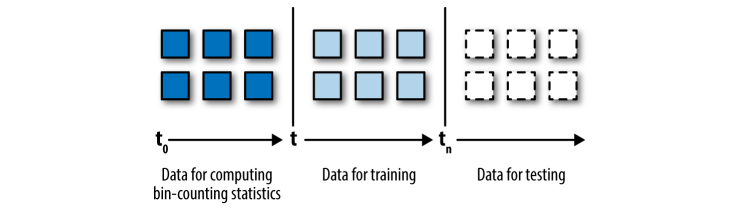

### 3.1 One Hot Encoding

In [120]:
df = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop('A16', axis=1),data['A16' ], test_size=0.3,random_state=0)

In [22]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1


In [62]:
#1/ OneHotEncoding using Pandas
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']
#to avoid the dummy variable trap, drop one of the variables
X_train_enc = pd.get_dummies(X_train[vars_categorical],drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical],drop_first=True)

In [63]:
X_train_enc.head(2)

,A1_b,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,A6_ff,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The beauty of pandas' get_dummies() function is that it returns feature names that clearly indicate which variable and which category each feature represents. On the downside, get_dummies() does not persist the information learned from the train set to the test set.
Contrarily, scikit-learn's OneHotEncoder() function can persist the information from the train set, but it returns a NumPy array, where the information about the meaning of the features is lost.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
#2/ OneHotEncoding using scikit learn
encoder = OneHotEncoder(categories='auto',drop='first',sparse='False',)
encoder.fit(X_train[vars_categorical])

OneHotEncoder(drop='first', sparse='False')

In [65]:
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])

In [67]:
#Why do we get a different number of features than pandas?????
X_train_enc.toarray().shape

(483, 38)

### 3.2 OneHotEncoding of Frequent Categories
One-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

The most frequent categories need to be determined in the train set. As
with any machine learning algorithm, this is to avoid overfitting and
information leakage.

In [84]:
X_train['A6'].unique()

array(['c', 'q', 'w', 'ff', 'm', 'i', 'e', 'cc', 'x', 'd', 'k', 'j', nan,
       'aa', 'r'], dtype=object)

In [87]:
X_train['A6'].value_counts().sort_values(ascending=False).head(5)

c    93
q    56
w    48
i    41
k    38
Name: A6, dtype: int64

In [93]:
top_5 = X_train['A6'].value_counts().sort_values(ascending=False)[:5].index.values

In [96]:
#let's add a binary variable per top category in the train and test sets
for category in top_5:
    X_train['A6'+'_'+category] = np.where(X_train['A6'] == category,1,0)
    X_test['A6'+'_'+category] = np.where(X_test['A6'] == category,1,0)

In [98]:
X_train.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A6_c,A6_q,A6_w,A6_i,A6_k
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159,1,0,0,0,0
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0,0,1,0,0,0


### 3.3 Replacing Categories with Ordinal Numbers

Ex: cities = ['Budapest','Paris','Denver'] --> [1,2,3]

Ordinal encoding is better suited for nonlinear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target.

In [121]:
#1/ Using Pandas
ordinal_mapper = {df['A7'].unique()[i] : i for i in range(len(df['A7'].unique()))}

In [122]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,ff,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,x,v,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,v,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,h,2.290,t,t,7,t,g,140.0,2384


In [123]:
X_train['A7'] = X_train['A7'].map(ordinal_mapper)
X_test['A7'] = X_test['A7'].map(ordinal_mapper)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [129]:
#2/ Using scikit learn
encoder = OrdinalEncoder()
encoder.fit(X_train.dropna())

OrdinalEncoder()

In [ ]:
X_train_enc = le.transform(X_train)
X_test_enc = le.transform(X_test)

### 3.4 Replacing Categories with Counts/Frequency of Observations

Very popular in data science competitions, but note that if two different categories are present in the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [132]:
df = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop('A16', axis=1),df['A16' ], test_size=0.3,random_state=0)

In [133]:
#here count(j) = count(dd) so we may lose information related to that
X_train['A7'].value_counts()

v     277
h     101
ff     41
bb     39
z       7
dd      5
j       5
n       3
o       1
Name: A7, dtype: int64

In [135]:
# 1/ Using Pandas
count_map = X_train['A7'].value_counts()/len(X_train)
X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

### 3.5 Encoding with Integers in an Ordered Manner
In the Replacing categories with ordinal numbers recipe, we replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, this encoding method may not work so well with linear models. We can instead assign integers to the categories given the target values. To do this, we do the following:
1. Calculate the mean value of the target per category.
2. Order the categories from the one with the lowest to the one with the highest target mean value.
3. Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

In [155]:
#1/ Using Pandas #A7: feature, A16: target
means = df.groupby(df['A7'])['A16'].mean()
ordered_mapper = {category:order for order,category in enumerate(means.sort_values().index)}
ordered_mapper

{'ff': 0, 'dd': 1, 'j': 2, 'v': 3, 'bb': 4, 'n': 5, 'o': 6, 'h': 7, 'z': 8}

In [156]:
X_train['A7'] = X_train['A7'].map(ordered_mapper)
X_test['A7'] = X_test['A7'].map(ordered_mapper)

In [157]:
X_train['A7']

596    3.0
303    3.0
204    3.0
351    0.0
118    3.0
      ... 
359    0.0
192    3.0
629    3.0
559    7.0
684    3.0
Name: A7, Length: 483, dtype: float64

### 3.6 Mean Encoding 
(Covered in Kaggle Competition Course)

### 3.7 Encoding with the Weight of Evidence (WoE)
The Weight of Evidence (WoE) was developed primarily for credit and financial industries to facilitate variable screening and exploratory analysis and to build more predictive linear models to evaluate the risk of loan default; that is, to predict how likely money lent to a person or institution is to be lost.<br>
The WoE is computed from the basic odds ratio:<br>
- WoE = log(p(Y==1)/p(Y==0))

Here, p(Y=1) is the probability of an event occurring. Therefore, the WoE takes the following values:<br>
- WoE = 0 if p(1) / p(0) = 1, that is, if the outcome is random (50/50)
- WoE > 0 if p(1) > p(0)
- WoE < 0 if p(0) > p(1)

This allows for a direct visualization of the predictive power of the category in the variable: the higher the WoE, the more likely the event will occur, and in fact, if the W0E is positive, the event is likely to occur.

In [160]:
#the probability of the target being 1, for each catgory A1:
p1 = df.groupby(['A1'])['A16'].mean() 
p0 = 1 - p1

In [163]:
woe = np.log(p1/p0)
woe

A1
a   -0.133531
b   -0.240468
Name: A16, dtype: float64

In [164]:
X_train['A1'] = X_train['A1'].map(woe)
X_test['A1'] = X_test['A1'].map(woe)

### 3.8 Grouping Rare or Infrequent Categories

Rare values are those categories that are present only in a small percentage of the observations. Typically, any value below 5 % can be considered rare. Infrequent labels often appear only on the train set or only on the test set, therefore making the algorithms prone to overfitting or unable to score an observation. To avoid these complications, we can group infrequent
categories into a new category called Rare or Other.

In [15]:
#Let's check the % of observations per category in A7
#z, j, dd, n, o can be classified as rare
X_train['A7'].value_counts()/len(X_train)*100 

v     57.349896
h     20.910973
ff     8.488613
bb     8.074534
z      1.449275
j      1.035197
dd     1.035197
n      0.621118
o      0.207039
Name: A7, dtype: float64

In [47]:
#find frequent labels
#1/ Using lists:
temp = X_train['A7'].value_counts()/len(X_train)*100
frequent_labels = [x for x in temp.loc[temp>5].index.values]

#2/ Using dictionaries:
category_percentage = dict(X_train['A7'].value_counts()/len(X_train)*100)
frequent_labels = [k for k,v in category_percentage.items() if v >= 5]
frequent_labels

['v', 'h', 'ff', 'bb']

In [48]:
#Replace rare labels with the 'rare' string
X_train['A7'] = np.where(X_train['A7'].isin(frequent_labels),X_train['A7'],'rare')
X_test['A7'] = np.where(X_test['A7'].isin(frequent_labels),X_test['A7'],'rare')

In [49]:
X_train['A7'].value_counts()/len(X_train)*100

v       57.349896
h       20.910973
ff       8.488613
bb       8.074534
rare     5.175983
Name: A7, dtype: float64

### 3.9 Feature Hashing
(Used for highly cardinal features)


A hash function is a deterministic function that maps a potentially unbounded integer to a finite integer range [1, m].

1. We determine, arbitrarily, the number of binary vectors to represent the category. (Ex:5) . 
2. Create a hash function that will take a category and return a number between 0 and m-1, where m is the number of binary vectors. In our example, the hash function should return a value between 0 and 4. Let's say our hash function returns the value of 3 for the category blue. That means that our category blue will be represented by a 0 in the vectors 0, 1, 2, and 4 and 1 in the vector 3: [0,0,0,1,0]. 

An example of a hash function is the module or remainder. In our example, it would be the remainder of 5.  hash function: x // 5

In [134]:
from sklearn.feature_extraction import FeatureHasher

In [138]:
#it takes a dictionary, not sure how to use it
hasher = FeatureHasher(n_features=5)

## ========================================================================
## <a id = 4> 4. Transforming Numerical Variables </a>

Linear and logistic regression assume that the variables are normally distributed. If they are not, we can often apply a mathematical transformation to change their distribution into Gaussian, and sometimes even unmask linear relationships between variables and their targets. This means that transforming variables may improve the performance of linear machine learning models. Commonly used mathematical transformations include the logarithm, reciprocal, power, square and cube root transformations, as well as the Box-Cox and Yeo-Johnson transformations

1. Log Transformation
2. Reciprocal Function Transformation (1/x <==> np.reciprocal) (what is it used for?) (skip)
3. Square and Cube Root Transformation (np.sqrt, bp.cbrt) (skip)
4. Power Transformations (np.power) (skip)
5. Box-Cox transformation (X**λ - 1)/λ (stats.boxcox) (skip)<br>
    Works only when data is positive. For nonpositive data, one could shift the values by adding a fixed constant. By default, the scipy implementation of Box-Cox transform finds the lambda parameter that will make the output the closest to a normal distribution
6. Yeo-Johnson transformation on numerical variables (stats.yeojohnson) (skip)

In [7]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

In [52]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


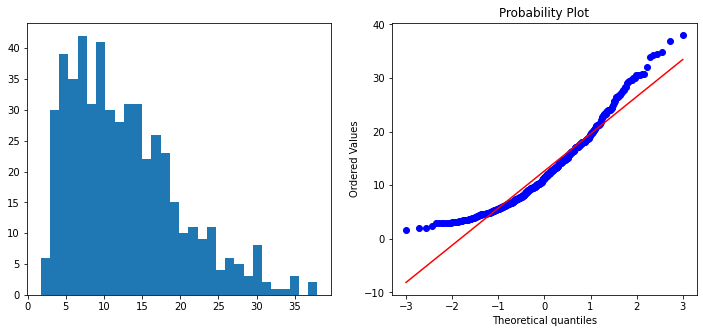

In [72]:
#Check if LSTAT is normally distributed
def diagnostic_plots(df,variable):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.hist(df[variable],bins=30)
    #Q-Q plot, we can see that LSTAT is not normally distributed
    ax2 = stats.probplot(df[variable],dist='norm',plot=plt);

diagnostic_plots(df,'LSTAT')

In [69]:
df_copy = df.copy()
#Apply log transformation to some variables
df_copy[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(df_copy[['LSTAT', 'NOX', 'DIS', 'RM']])

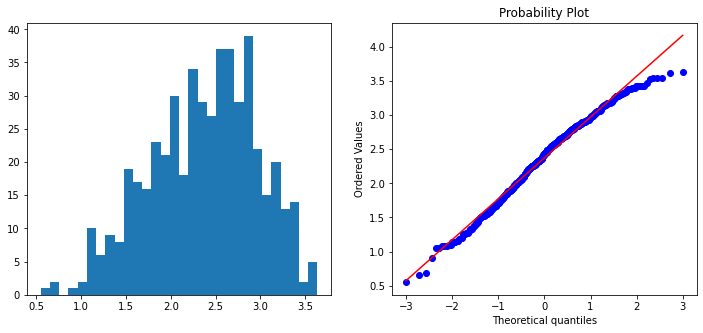

In [73]:
#Check if LSTAT is normally distributed now. It looks more 'normal'?
diagnostic_plots(df_copy,'LSTAT')

## ========================================================================
## <a id=5> 5. Feature Discretization (Binning)</a>

Binning is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models.

There are Supervised (using target) and Unsupervised (using features) approaches to transform continuous variables into discrete ones. 

1. Binning with Equal Width Intervals
2. Binning with Equal Frequency Intervals
3. Binning + Categorical Encoding in an ordered manner (3.5) (skip)
4. Binning with User pre-defined Intervals (skip)
5. Binning with k-means Clustering
6. Binning with Decision Trees

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.3,random_state=0)

### 5.1 Binning with Equal Width Intervals

In [112]:
num_bins = 10
interval_width = int((X_train['LSTAT'].max() - X_train['LSTAT'].min())/num_bins)

min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

print(min_value, max_value, interval_width)

1 37 3


In [113]:
bins = [i for i in range(min_value, max_value + interval_width,interval_width)]
bins

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [114]:
#include_lowest=True to include the lowest value in the 1st interval
X_train['LSTAT_DISC'] = pd.cut(X_train['LSTAT'],bins=bins,include_lowest=True)
X_test['LSTAT_DISC'] = pd.cut(X_test['LSTAT'], bins=bins,include_lowest=True)

In [116]:
# Intervals have the same width but not the same frequency
X_train['LSTAT_DISC'].value_counts()

(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(16.0, 19.0]    45
(13.0, 16.0]    44
(0.999, 4.0]    28
(19.0, 22.0]    21
(22.0, 25.0]    17
(28.0, 31.0]     9
(25.0, 28.0]     7
(34.0, 37.0]     4
(31.0, 34.0]     0
Name: LSTAT_DISC, dtype: int64

### 5.2 Binning with Equal Frequency Intervals
Equal-frequency discretization divides the values of the variable into intervals that carry the same proportion of observations. The interval width is determined by quantiles, so different intervals may have different widths. This discretization technique is particularly useful for skewed variables as it spreads the observations over the different bins equally.

In [133]:
#Divide LSTAT into 10 quantiles
X_train['LSTAT_DISC'], bins = pd.qcut(X_train['LSTAT'], 10,labels=None, retbins=True)
X_test['LSTAT_DISC'] = pd.cut(x = X_test['LSTAT'], bins=bins)

In [131]:
#the intervals have similar proportions of observations
X_train['LSTAT_DISC'].value_counts()/len(X_train)

(7.528, 9.5]       0.104520
(1.729, 4.623]     0.101695
(13.26, 15.565]    0.101695
(15.565, 18.06]    0.101695
(22.453, 36.98]    0.101695
(4.623, 6.202]     0.098870
(6.202, 7.528]     0.098870
(11.16, 13.26]     0.098870
(9.5, 11.16]       0.096045
(18.06, 22.453]    0.096045
Name: LSTAT_DISC, dtype: float64

### 5.5 Binning with k-means Clustering
The bins are the clusters identified by the kmeans algorithm. The number of clusters (k) is defined by the user. The k-means clustering algorithm has two main steps:
1. Initialization step: k observations are chosen randomly as the initial centers of the k clusters, and the remaining data points are assigned to the closest cluster. 
2. Iteration step: the centers of the clusters are re-computed as the average points of all of the observations within the cluster, and the observations are reassigned to the newly created closest cluster. The iteration step continues until the optimal k centers are found. 

In [136]:
from sklearn.preprocessing import KBinsDiscretizer

In [146]:
disc = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')
disc.fit(X_train[['LSTAT']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [148]:
disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
       18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
       36.98      ])], dtype=object)

In [152]:
X_train['LSTAT_KMEANS'] = disc.transform(X_train[['LSTAT']])
X_train['TEST_KMEANS'] = disc.transform(X_test[['LSTAT']])

### 5.6 Binning with Decision Trees
Uses a decision tree to identify the optimal bins in which to sort the feature values. The decision tree is built using the feature to discretize, and the target. When a decision tree makes a prediction, it assigns an observation to one of N end leaves, therefore, any decision tree will generate a discrete output, the values of which are the predictions at each of its N leaves. Discretization with decision trees creates a monotonic relationship between the bins and the target. 

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
tree_model = DecisionTreeRegressor(max_depth=3,random_state=0)
tree_model.fit(X_train[['LSTAT']],y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [162]:
X_train['LSTAT_TREE'] = tree_model.predict(X_train[['LSTAT']])
X_test['LSTAT_TREE'] = tree_model.predict(X_test[['LSTAT']])
#For classification:
#X_train['LSTAT_TREE'] = tree_model.predict_proba(X_train['LSTAT'].to_frame())[:,1]

In [164]:
#check the bins
X_train['LSTAT_TREE'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

## ========================================================================
## <a id=6> 6. Outliers </a>

Statistical parameters such as the mean and variance are sensitive to outliers. Outliers may also affect the performance of some machine learning models, such as linear regression or AdaBoost. Therefore, we may want to remove or engineer the outliers in the variables of our dataset. Ways to deal with outliers:
- Binning
- Treat like missing data

But here we will discuss:
1. Trimming outliers from the dataset
2. Winsorization
3. Capping the variable at arbitrary maximum and minimum values
4. Performing zero-coding – capping the variable values at zero (as said) (skip)

### 6.1 Trimming Outliers

C:\Users\oula.aabkari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


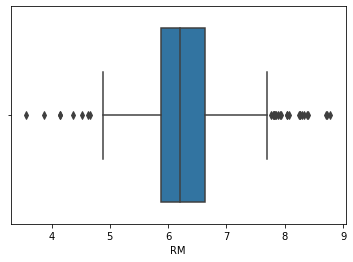

In [171]:
sns.boxplot(df['RM']);

In [172]:
#we make a function to find the boundaries of a variable using the inter-quartile range
def find_boundaries(df,feature,distance):
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_boundary = df[feature].quantile(0.25) - distance*iqr
    upper_boundary = df[feature].quantile(0.75) + distance*iqr
    return upper_boundary, lower_boundary

In [191]:
#instead of the iqr, we can use the mean and std
def find_boundaries2(df,feature,distance):
    lower_boundary = df[feature].mean() - distance*df[feature].std()
    upper_boundary = df[feature].mean() + distance*df[feature].std()
    return upper_boundary, lower_boundary

In [190]:
RM_upper, RM_lower = find_boundaries(df,'RM',1.5)

#rows to delete
outliers = (df['RM'] < RM_lower) | (df['RM'] > RM_upper)
df_trimmed = df.loc[~outliers,:]

### 6.2 Winsorization
It's the process of transforming the data by limiting the outliers, to a certain arbitrary value, closer to the mean of the distribution. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile.

In [193]:
lower_limit = df['RM'].quantile(0.05)
upper_limit = df['RM'].quantile(0.9)

In [194]:
# Method1
df['RM_WIN'] = df['RM']
df['RM_WIN'][df['RM'] < lower_limit] = lower_limit
df['RM_WIN'][df['RM'] > upper_limit] = upper_limit

In [ ]:
# Method2: replace directly within the dataframe
np.where(df['RM'] > upper_limit, upper_limit,np.where(df['RM'] < lower_limit, lower_limit,df['RM']))

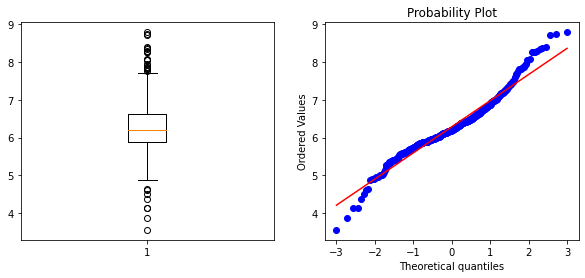

In [214]:
#we can see here that there are no outliers
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.boxplot(df['RM']);
ax2 = stats.probplot(df['RM'],dist='norm',plot=plt);

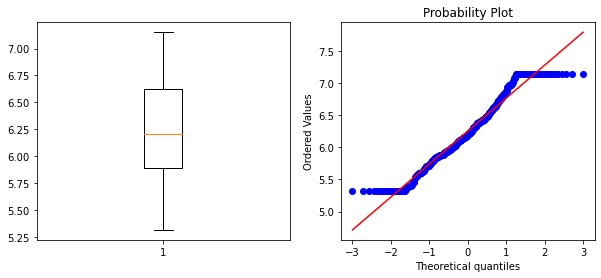

In [215]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.boxplot(df['RM_WIN']);
ax2 = stats.probplot(df['RM_WIN'],dist='norm',plot=plt);

### 6.3 Capping the variable at arbitrary maximum and minimum values

Similar to winsorization, instead we replace the outliers by predetermined max and min values which we decide using the min/max +/- std or the iqr. This
procedure is also called bottom and top coding, censoring, or capping.  

same as 6.1, but replacing instead of deleting

## ========================================================================
## <a id=7> 7. Feature Scaling</a>

Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input. Tree-based models, on the other hand, couldn’t care less. 

1. Standardization
2. Mean Normalization
3. Scaling to the maximum and minimum values
4. Maximum absolute scaling
5. Scaling with the median and quantiles
6. Scaling to vector unit length (x/norm, common for text classification) (Normalizer()) (skip)

### 7.1 Standarizing

We center the variable at 0 and standarize the variance to 1. The result is called the z-score and represents how many standard deviations a given observation deviates from the mean. 

                            z = (x - mean) / std

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7.2 Mean Normalization

We center the variable at 0 and rescale the distribution to the value range.

                        x_scaled = (x - mean) / (max - min) 

                        x_scaled is in  [-1,1]

In [11]:
means = X_train.mean()
ranges = X_train.max() - X_train.min()

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

### 7.3 Scaling to the Maximum and Minimum Values
                        x_scaled = (x - min) / (max - min) 
                        
                        x_scaled is in [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### 7.4 Maximum Absolute Scaling
                        x_scaled = x / max
                        
                        x_scaled is in [0,1]

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

### 7.5 Scaling with the Median and Quantiles

This method is known as robust scaling because it produces more robust estimates for the center and value range of the variable, and is recommended if the data contains outliers. 

                        x_scaled = x - meadian / (75th quantile - 25th quantile)
                        
                        x_scaled is in [0,1]

In [ ]:
from sklearn.preprocessing import RobustScaler

## ========================================================================
## <a id=8> 8. Applying Mathematical Computations to Features </a>

Mathematical functions are usually derived via domain knowledge of the industry. But We can also combine variables automatically, by creating polynomial combinations of the existing variables in the dataset or by algorithms such as decision trees and Principal Component Analysis (PCA). 

1. Combining multiple features with statistical operations
2. Polynomial expansion (sklearn.preprocessing PolynomialFeatures) (skip)
3. Deriving new features with decision trees
4. Principal Component Analysis

### 8.1 Combining multiple features with statistical operations

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [18]:
features = ['mean smoothness', 'mean compactness','mean concavity', 'mean concave points','mean symmetry']

#All in one Line
df_t = df[features].agg(['sum','prod','mean','std', 'max', 'min'], axis='columns')
df_t.head(2)

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.21702,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.10033,0.045671,0.1812,0.07017


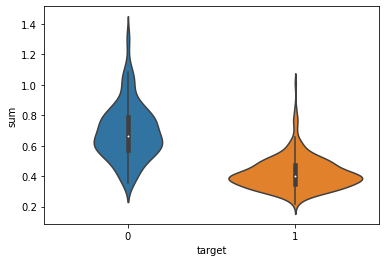

In [26]:
#we can check wether added features provide valuable information or not
#here the distribution of the 'sum' feature is different between cancerous and normal tumors
sns.violinplot(x=df['target'], y=df_t['sum'], data=df);

### 8.3 Feature Generation with Decision Trees (linear)

In the winning solution of the KDD competition in 2009, the authors created new features by combining two or more variables using decision trees and then used those variables to train the winning predictive model. This technique is particularly useful to derive features that are monotonic with the target, which is convenient for linear models. The procedure consists of building a decision tree using a subset of the features, typically two or three at a time, and then using the prediction of the tree as a new feature.

Creating new features with decision trees not only creates monotonic relationships between features and target, but it also captures feature interactions, which is useful when building models that do not do so automatically, such as linear models.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5,
                          scoring = 'neg_mean_squared_error',
                          param_grid = {'max_depth': [3, 4, None]})

In [ ]:
tree_model.fit(X_train[['LSTAT', 'RM', 'NOX']], y_train)

In [ ]:
X_train['new_feat'] = tree_model.predict(X_train[['LSTAT', 'RM','NOX']])
X_test['new_feat'] = tree_model.predict(X_test[['LSTAT', 'RM','NOX']])

### 8.4 Principal Component Analysis (linear)

PCA is a dimensionality reduction technique used to reduce a high dimensional dataset into a smaller subset of Principal Components (PC), which explain most of the variability observed in the original data. 

The first PC of the data is a vector along which the observations vary the most, or in other words, a linear combination of the variables in the dataset that maximizes the variance. Mathematically, the first PC minimizes the sum of the squared distances between each observation and the PC. 

The second PC is again a linear combination of the original variables, which captures the largest remaining variance and is subject to the constraint that is perpendicular to the first PC.

In general, each PC is a linear combination of the variables, orthogonal to the other components, and maximizes the remaining variance, which is left unexplained by previous PCs. It is often possible for a few of the first PCs to capture most of the information of the original data, as well as most of its relationships to the target.

#### Notes
- PCA is a <b>linear projection</b>
- It involves calculating the SVD --> Computationally expensive for > a few 1000 features.
- Very useful as a preprocessing step when there are linear correlations between features.
- Outcome is uninterpretable (most of the time, we don't know what concept the eigenvectors represent)
- Discards information from data, so can be less accurate.
- Often used in: anomaly detection, financial modeling (find correlated stocks),...

In [2]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=None)
pca.fit(X_train)

train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

When creating principal components, a few of the components will capture most of the variability of the original data. To identify how many components capture most of the variability in the Boston House Prices dataset, we can plot the percentage of variance explained (by each component) versus the component number.

We can see that the first two components capture most of the variability of the data. Therefore, we can use the first two components to train our machine learning models using a linear model.

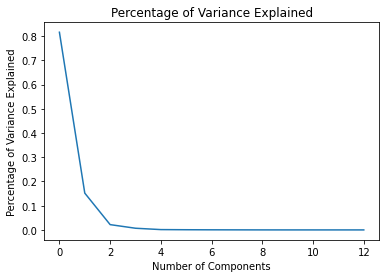

In [31]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained');

### 8.5 Non-linear Feature Generation with k-means

- PCA is useful when data lies in a linear subspace, but if the data forms a more complicated shape we need to use a non-linear featurization technic.
- Non-linear dimensionality reduction assumes that the manifold (multi dimensional shape formed by our data) is simpler than the full dimensiob it occupies and attempts to unfold it.
- The key is that even if the manifold is complicated, the local neighborhood around each point can often be approximated with a patch of flat surface.
- With clustering, a datapoint can be represented by its cluster's vector.
- We want to get to a smaller amount of features which represent the spatial characteristics of the data. Note that sometimes clustering may produce more features??
- Below we use One-Hot Cluster membership as a new feature. but instead of one-hot cluster membership, a data point can also be represented by a dense vector of its inverse distance to each cluster center. This retains more information than simple binary cluster assignment, but is computationally expensive.
- Using k-means to turn spatial data into features is an example of model stacking, where the input to one model is the output of another. Another example of stacking is to use the output of a decision tree–type model (random forest or gradient boosting tree) as input to a linear classifier.
- The key intuition with stacking is to push the nonlinearities into the features and use a very simple, usually linear model as the last layer.

In [53]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [61]:
from sklearn import manifold, datasets
from sklearn.datasets import make_moons
from sklearn.metrics import roc_curve
from mpl_toolkits.mplot3d import Axes3D

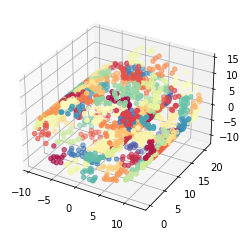

In [16]:
#VISUALIZATION OF CLUSTERS
#generate a swiss roll dataset
X, color = datasets.make_swiss_roll(n_samples=1500)

#approximate the data with 100 k-means clusters
clusters_swiss_roll = KMeans(n_clusters=100, random_state=1).fit_predict(X)

#plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=clusters_swiss_roll,cmap='Spectral')

In [114]:
#CLUSTER FEATURE GENERATION
#Generate training data
train_data, train_labels = make_moons(n_samples=2000,noise=0.2)

#Generate the test data
test_data, test_labels = make_moons(n_samples=2000,noise=0.3)

pd.DataFrame({'X1':train_data[:,0],'X2':train_data[:,1],'Y':train_labels}).head(2)

,X1,X2,Y
0,-0.404824,0.857653,0
1,1.342280,-0.478913,1


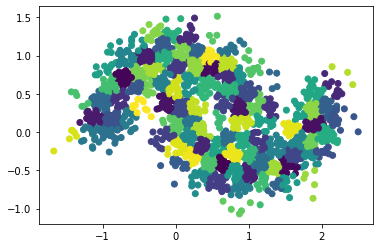

In [125]:
#Fit and train the k means model
km_model = KMeans(n_clusters=100,n_init=20)
km_model.fit(train_data)

#ONE-HOT CLUSTER MEMBERSHIP
#Generated cluster based train and test features = closest cluster ID to each datapoint
train_cluster_features = km_model.predict(train_data)[:,np.newaxis] #np.newaxis adds a new dimension <=> reshape()
test_cluster_features = km_model.predict(test_data)[:,np.newaxis]

#Add the cluster features to the existing features
train_with_cluster = np.hstack((train_data,train_cluster_features))
test_with_cluster = np.hstack((test_data,test_cluster_features))


plt.scatter(train_data[:,0],train_data[:,1],c=train_cluster_features)

In [126]:
pd.DataFrame(test_with_cluster,columns=['X1','X2','X_clusters']).head()

,X1,X2,X_clusters
0,-0.343892,-0.141909,19.0
1,0.855038,-0.059154,60.0
2,-0.855228,0.772830,55.0
3,2.089166,0.369950,30.0
4,-0.467744,0.742311,79.0


In [127]:
#CLASSIFICATION USING EXISTING FEATURES+FEATURES WITH CLLUSTERS
# we use the LogisticRegression model
lr_cluster = LogisticRegression().fit(train_with_cluster,train_labels)

#CLASSIFICATION USING EXISTING FEATURES ONLY

#classifier_names = ['LR','kNN','RBF SVM','Random Forest','Boosted Trees']
classifier_names = ['LR']

#classifiers = [LogisticRegression(),
#               KNeighborsClassifier(5),
#               SVC(gamma=2,C=1),
#               RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
#               GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_depth=5)]

classifiers = [LogisticRegression()]

for model in classifiers:
    model.fit(train_data,train_labels)

In [128]:
#Helper function to evaluate classifier performance using ROC
def test_roc(model,data,labels):
    if hasattr(model,"decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, _ = roc_curve(labels,predictions)
    
    return fpr, tpr

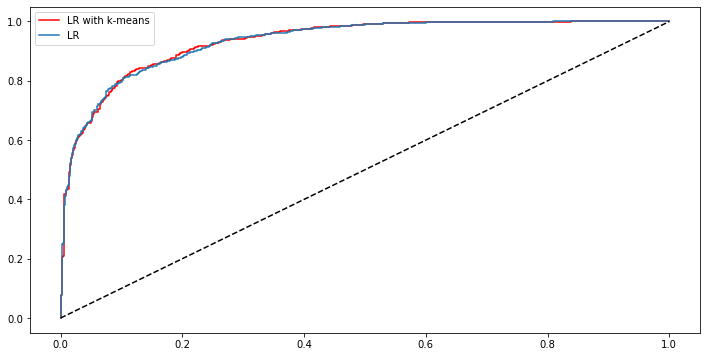

In [129]:
#PLOT RESULTS: LR with k-means features is supposed to do better than LR But I don't see the difference (^^??)
plt.figure(figsize=(12,6))
fpr_cluster, tpr_cluster = test_roc(lr_cluster, test_with_cluster, test_labels)
plt.plot(fpr_cluster, tpr_cluster, 'r-', label='LR with k-means')

for i, model in enumerate(classifiers):
    fpr, tpr = test_roc(model, test_data, test_labels)
    plt.plot(fpr, tpr, label=classifier_names[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.legend();

## ========================================================================
## <a id=9> 9. Feature Generation with Transactional and Time Series Data </a>

1. Aggregating transactions with mathematical operations (groupby().agg([operations]) (skipped)
2. Aggregating transactions in a time window
3. Determining the number of local maxima and minima
4. Deriving time elapsed between time-stamped events
5. Deriving Features from Date and Time Variables

### 9.1 Aggregating Transactions in a Time Window (Moving Average)
When we want to predict an event at a certain point in time, often, transactions or values closer to the event tend to be more relevant. 

We can use mathematical operations to summarize historical data, just like in (10.1), but only for a certain temporal window. This way, we can create features such as the maximum amount spent in the last week or the number of transactions in the last month,... 

In [38]:
cols = ['date', 'Appliances', 'lights']
data = pd.read_csv('energydata_complete.csv', usecols=cols)
data['date'] = pd.to_datetime(data['date'])
data.head(2)

,date,Appliances,lights
0,2016-01-11 17:00:00,60,30
1,2016-01-11 17:10:00,60,30


In [41]:
#Features that captures the average energy consumption by appliances and lights in the last 60 minutes (6 observations)
data_rolled = data.rolling(window=6,on='date').mean()
#or
operations_dict = {'Appliances':['sum','max','min'],'lights':['mean','median','std']}
data_rolled = data.rolling(window=6).agg(operations_dict)

In [43]:
data_rolled.head(10)

Appliances                 lights                 
         sum   max   min       mean median       std
0        NaN   NaN   NaN        NaN    NaN       NaN
1        NaN   NaN   NaN        NaN    NaN       NaN
2        NaN   NaN   NaN        NaN    NaN       NaN
3        NaN   NaN   NaN        NaN    NaN       NaN
4        NaN   NaN   NaN        NaN    NaN       NaN
5      330.0  60.0  50.0  35.000000   35.0  5.477226
6      330.0  60.0  50.0  38.333333   40.0  7.527727
7      330.0  60.0  50.0  41.666667   40.0  7.527727
8      340.0  60.0  50.0  43.333333   40.0  5.163978
9      360.0  70.0  50.0  43.333333   40.0  5.163978

### 9.2 Determining the Number of Local Maxima and Minima

In [45]:
from scipy.signal import find_peaks

In [90]:
from scipy.signal import argrelextrema, argrelmin, argrelmax

In [46]:
#we extract date, month, hour from the previous dataset
data[['day', 'month', 'hr']] = pd.DataFrame([(x.day, x.month,x.hour) for x in data['date']])

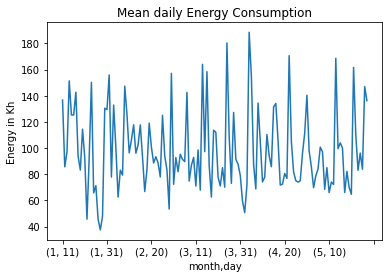

In [50]:
daily_ec = data.groupby(['month', 'day'])['Appliances'].mean()

daily_ec.plot()
plt.ylabel('Energy in Kh')
plt.title('Mean daily Energy Consumption');

In [119]:
#Method 1
#get the local maxima, with the constraint that the local maxima can't show values below the 60kh baseline
peaks, _ = find_peaks(daily_ec,height=60) #peaks= indexes of local maxima, _ = height of local maxima

#get the local minima
valleys, _ = find_peaks(1/daily_ec,height=(0,1/60)) #height is limited here

In [101]:
#Method 2
# for local maxima
peaks = argrelextrema(daily_ec.to_numpy(), np.greater)[0].reshape(1,-1)

# for local minima
valleys = argrelextrema(daily_ec.to_numpy(), np.less)[0].reshape(1,-1)

In [122]:
#Method 3
# for local maxima
peaks = argrelmax(daily_ec.to_numpy())[0].reshape(1,-1)

# for local minima
valleys = argrelmin(daily_ec.to_numpy())[0].reshape(1,-1)

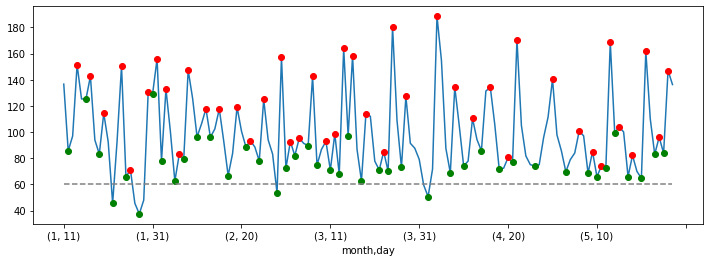

In [123]:
plt.figure(figsize=(12, 4))
daily_ec.plot()
plt.plot(peaks, daily_ec.values[peaks], "o", color='red')
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')
plt.plot(np.full_like(daily_ec, 60), "--", color="gray");

### 9.3 Deriving Time Elapsed between Time-Stamped Events

Earlier, we created new features that summarize information about the variable (mean, max,...). It is also possible to perform these mathematical operations over the time-stamp and obtain information about the time between transactions or the time between specific events.
<br>Ex:<br>
Time between successive records of the variable values.<br>
Time between specific events, such as the time between peaks of energy consumption,...

In [128]:
data['time_since_previous'] = data['date'].diff()

#in minutes
data['time_since_previous'] = data['time_since_previous']/np.timedelta64(1,'m')

In [131]:
data.head(2)

,date,Appliances,lights,day,month,hr,time_since_previous
0,2016-01-11 17:00:00,60,30,11,1,17,NaN
1,2016-01-11 17:10:00,60,30,11,1,17,10.0


### 9.4 Deriving Features from Date and Time Variables</a>

1. Deriving representations of the year and month

    Some events occur more often at certain times of the year, for example, recruitment rates, increase after Christmas and slow down toward the summer holidays in Europe. Businesses and organizations want to evaluate performance and objectives at regular intervals throughout the year, for example, at every quarter or every semester.
    
    
2. Creating representations of day and week

    Some events occur more often on certain days of the week, for example, loan applications occur more likely during the week than over weekends, whereas others occur more often during certain weeks of the year. Businesses and organizations may also want to track some key performance metrics throughout the week.


3. Extracting time parts from a time variable

    Some events occur more often at certain times of the day, for example, fraudulent activity occurs more likely during the night or early morning. Also, occasionally, organizations want to track whether an event occurred after another one, in a very short time window, for example, if sales increased on the back of displaying a TV or online advertisement.

In [216]:
rng_ = pd.date_range('2019-03-05', periods=20, freq='T')
df = pd.DataFrame({'date': rng_})
df.head()

,date
0,2019-03-05 00:00:00
1,2019-03-05 00:01:00
2,2019-03-05 00:02:00
3,2019-03-05 00:03:00
4,2019-03-05 00:04:00


In [ ]:
df['date'].dt.date[0]
df['date'].dt.time[0]
df['date'].dt.month[0]
df['date'].dt.quarter[0] 
df['semester'] = np.where(df['quarter'].isin([1,2]), 1, 2)
df['date'].dt.day[0]
df['date'].dt.dayofweek[0]
df['day_week_name'] = df['date'].dt.weekday_name
df['is_weekend'] = np.where(df['day_week_name'].isin(['Sunday','Saturday']), 1, 0)
df['date'].dt.week #from 1 to 52
df['date'].dt.hour
df['date'].dt.minute
df['date'].dt.second
df['is_morning'] = np.where( (df['hour'] < 12) & (df['hour'] > 6),1,0)
df['elapsed_days'] = (df['date2'] - df['date1']).dt.days
df['months_passed'] = ((df['date2'] - df['date1']) / np.timedelta64(1,'M'))
df['months_passed'] = np.round(df['months_passed'],0)